# KIAM8 : WEEK 2 

Task 2: Sentiment and Thematic Analysis

Description: Quantify review sentiment and identify themes to uncover satisfaction drivers and pain points.

## Sub Tasks
###	Sentiment Analysis:

    Use distilbert-base-uncased-finetuned-sst-2-english to compute sentiment scores (positive, negative, neutral). Alternatively, you can start with simpler libraries like VADER or TextBlob and compare results if time permits.

    Aggregate by bank and rating (e.g., mean sentiment for 1-star reviews).

### Thematic Analysis:

    A theme refers to a recurring concept or topic within user reviews. For this challenge, themes will help summarize user feedback into actionable categories for the banks.
Keyword Extraction & Manual/Rule-Based Clustering:

    Extract significant keywords and n-grams using TF-IDF or spaCy (e.g., “login error”, “slow transfer”, “good UI”).

    To aid in grouping these keywords and understanding broader review topics, you can optionally employ topic modeling techniques

    Group related keywords and phrases into 3-5 overarching themes per bank (e.g., 'Account Access Issues', 'Transaction Performance', 'User Interface & Experience', 'Customer Support', 'Feature Requests'). #### Document your grouping logic.

### Pipeline:

    Script preprocessing (tokenization, stop-word removal, lemmatization if useful) with Pandas and NLP libraries.

    Save results as CSV (e.g., review_id, review_text, sentiment_label, sentiment_score, identified_theme(s)).

    Extract keywords with spaCy or TF-IDF (e.g., “crash”, “support”).
    
    Cluster into 3–5 themes per bank (e.g., UI, reliability).


In [ ]:
# Source - https://stackoverflow.com/a
# Posted by aaronsnoswell
# Retrieved 2025-11-30, License - CC BY-SA 4.0

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
# Allign File Directory

import sys
import os

# ignoring ssl due to issues

os.environ["HF_HUB_DISABLE_SSL_VERIFY"] = "1"

# --- Path Setup to find the 'scripts' folder ---

# 1. Get the current working directory (e.g., /Project_Folder/Notebooks)
current_dir = os.getcwd()

# 2. Navigate UP one directory ('..') and then INTO 'scripts'
# The abspath function resolves the '..' and gives the full, reliable path.
relative_scripts_path = os.path.join(current_dir, '..', 'scripts')
scripts_path = os.path.abspath(relative_scripts_path)

# 3. Add the 'scripts' folder path to Python's system path
if scripts_path not in sys.path and os.path.isdir(scripts_path):
    sys.path.append(scripts_path)
    print(f"Added scripts folder: {scripts_path}")
else:
    print("Scripts folder is already in path or not found.")
    
# Sanity Check
print("\n--- Current sys.path ---")
print(sys.path)

Added scripts folder: c:\Users\henokt\OneDrive - Inchcape\Documents\GitHub\Customer-Experience-Analytics-for-Fintech-Apps-Week-2\scripts

--- Current sys.path ---
['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.13_3.13.2544.0_x64__qbz5n2kfra8p0\\python313.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.13_3.13.2544.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.13_3.13.2544.0_x64__qbz5n2kfra8p0\\Lib', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.13_3.13.2544.0_x64__qbz5n2kfra8p0', 'c:\\Users\\henokt\\OneDrive - Inchcape\\Documents\\GitHub\\Customer-Experience-Analytics-for-Fintech-Apps-Week-2\\venv', '', 'c:\\Users\\henokt\\OneDrive - Inchcape\\Documents\\GitHub\\Customer-Experience-Analytics-for-Fintech-Apps-Week-2\\venv\\Lib\\site-packages', 'c:\\Users\\henokt\\OneDrive - Inchcape\\Documents\\GitHub\\Customer-Experience-Analytics-for-Fintech-Apps-Week-2\\scripts']


In [4]:
# Import the Cleaned Data from Step-1

import pandas as pd

df=pd.read_csv('../data/bank_reviews_clean.csv')

In [5]:
# Import the Sentiment & Theme Analyzer Script

from sentiment_and_theme import run_pipeline

# Pass the Cleaned Data to the Analyzer Script

df = pd.read_csv("../Data/bank_reviews_clean.csv")
enriched_df, agg = run_pipeline(df, review_column="review", output_file="../data/task2_results.csv")

c:\Users\henokt\OneDrive - Inchcape\Documents\GitHub\Customer-Experience-Analytics-for-Fintech-Apps-Week-2\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu


Pipeline finished. Results saved to ../data/task2_results.csv


In [6]:
# Examine the analyzed Data

enriched_df.head()

,review,rating,date,bank,source,sentiment_label,sentiment_score,clean_review,theme_cluster,identified_theme
0,Make it user friendly.,2,2025-11-29,CBE,Google Play,positive,0.992062,make it user friendly.,3,Customer Support
1,maaliif daddafee install gaafata,3,2025-11-28,CBE,Google Play,negative,0.987553,maaliif daddafee install gaafata,3,Customer Support
2,good app,5,2025-11-28,CBE,Google Play,positive,0.999849,good app,3,Customer Support
3,This application is very important and advanta...,5,2025-11-27,CBE,Google Play,positive,0.998468,this application is very important and advanta...,3,Customer Support
4,why didn't work this app?,1,2025-11-27,CBE,Google Play,negative,0.999198,why didnt work this app?,3,Customer Support


In [15]:
enriched_df.columns

Index(['review', 'rating', 'date', 'bank', 'source', 'sentiment_label',
       'sentiment_score', 'clean_review', 'theme_cluster', 'identified_theme'],
      dtype='object')

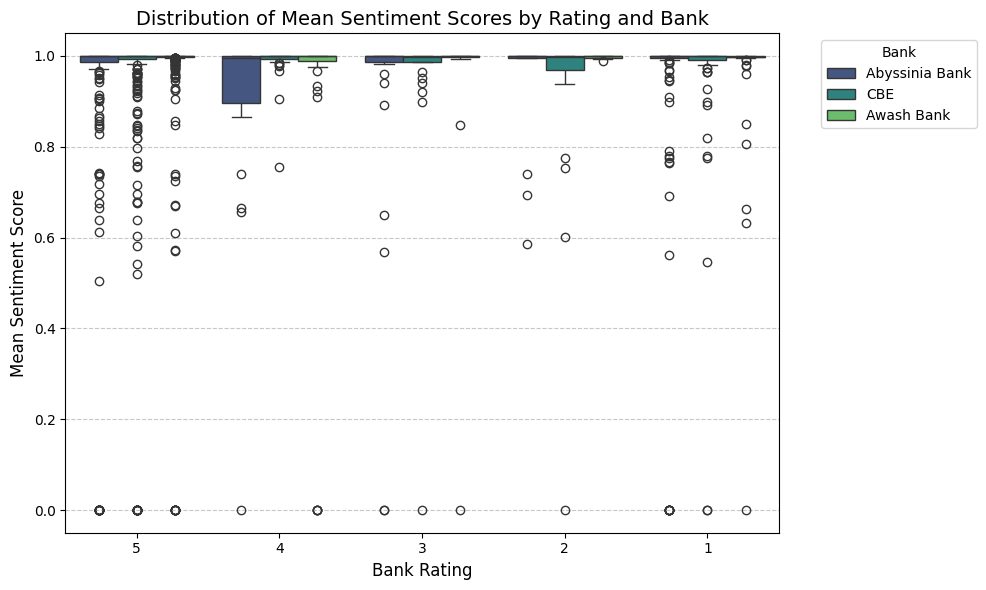

In [17]:
# Visualize the Analyzed Data

# Import Libraries

import seaborn as sns
import matplotlib.pyplot as plt

rating_order = [5,4,3,2,1]

df_for_viz =enriched_df[['bank','rating','sentiment_score']]

df_for_viz = df_for_viz.sort_values('rating')
# --- 2. Generate a Box Plot visualization using Seaborn ---
plt.figure(figsize=(10, 6))

# Box Plot: x='rating', y='sentiment_score', hue='bank'
sns.boxplot(
    data=df_for_viz,
    x='rating',
    y='sentiment_score',
    hue='bank',
    palette='viridis',
    order=rating_order
)

plt.title('Distribution of Mean Sentiment Scores by Rating and Bank', fontsize=14)
plt.xlabel('Bank Rating', fontsize=12)
plt.ylabel('Mean Sentiment Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Bank', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig('sentiment_rating_boxplot.png')

<Axes: xlabel='rating', ylabel='mean_sentiment_score'>

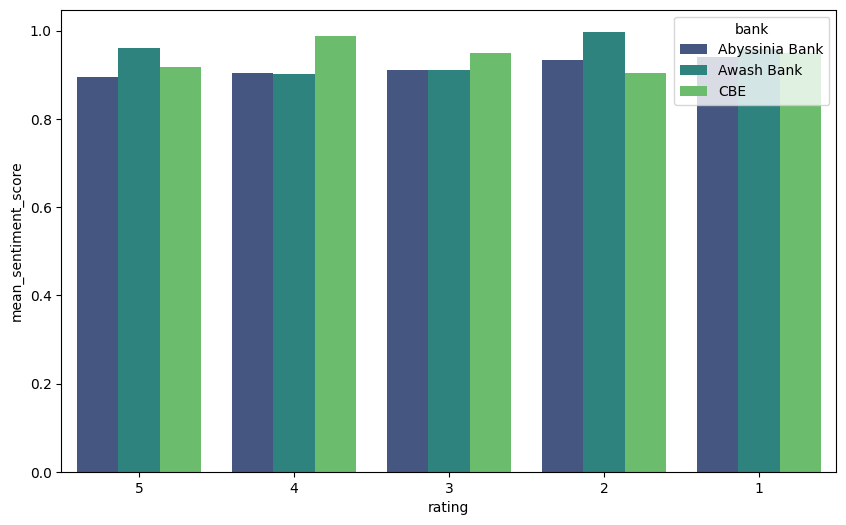

In [20]:
# Use a Bar Plot for comparison
plt.figure(figsize=(10, 6))
sns.barplot(
    data=agg, # Use the aggregated data
    x='rating',
    y='mean_sentiment_score',
    hue='bank',
    palette='viridis',
    order=rating_order
)

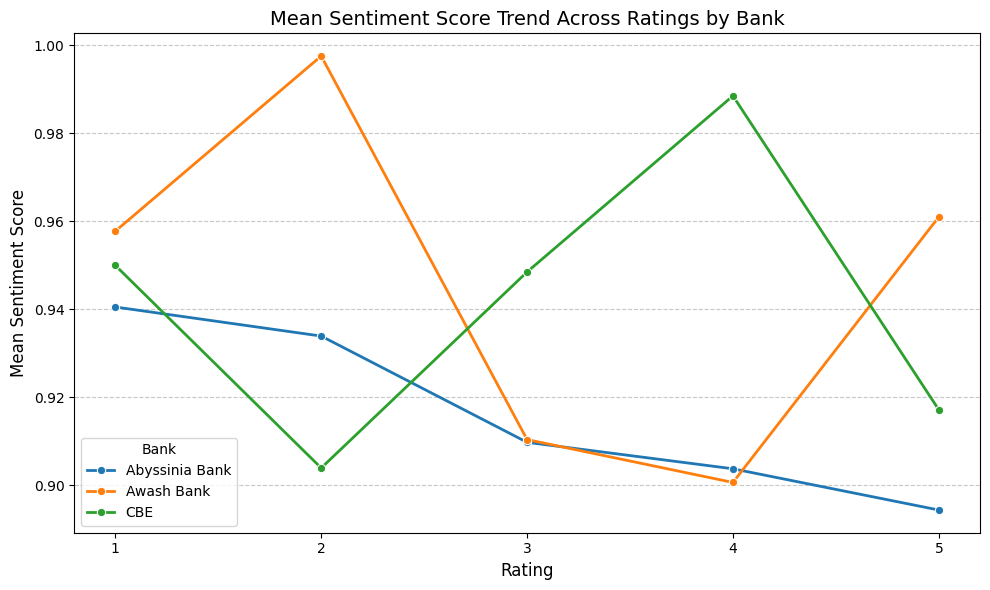

In [21]:
# Generate the Multi-Line Chart
plt.figure(figsize=(10, 6))

# Use seaborn.lineplot to show the trend of sentiment score across ratings for each bank
sns.lineplot(
    data=agg,
    x='rating',
    y='mean_sentiment_score',
    hue='bank',
    marker='o',  # Add markers for clarity at each rating point
    linewidth=2
)

plt.title('Mean Sentiment Score Trend Across Ratings by Bank', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Mean Sentiment Score', fontsize=12)

# Ensure x-axis ticks are integer ratings (1, 2, 3, 4, 5)
plt.xticks(df['rating'].unique()) 

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Bank', loc='lower left')
plt.tight_layout()

plt.savefig('mean_sentiment_score_line_chart.png')

### Take Aways

The generated chart clearly illustrates the trend of sentiment for each bank as the rating changes from 1 to 5.

Abyssinia Bank shows a consistent negative trend, where a lower rating (5) corresponds to the lowest sentiment score.

Awash Bank has a dramatic peak at rating 2 ( approx 0.998 ) and a notable jump at rating 5 ( approx 0.961).

CBE is the most volatile, with a low at rating 2 ( approx 0.904 ) and a high at rating 4 (approx 0.989 ).